<a href="https://colab.research.google.com/github/KalpitWalekar/Prepinsta/blob/main/Prepinsta_Week6_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SuperStore Sales EDA

##Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
doc=pd.read_csv('/content/drive/MyDrive/python_docs/train.csv')
doc.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


##Extensive Data Cleaning

In [ ]:
doc.columns=doc.columns.str.lower().str.replace(" ","_")
doc.drop('row_id',axis='columns',inplace=True)
doc.drop_duplicates(inplace=True)
doc['order_date']=pd.to_datetime(doc['order_date'],format="%d/%m/%Y")
doc['ship_date']=pd.to_datetime(doc['ship_date'],format="%d/%m/%Y")
#As we got the Zip for east Burlington,vermont is 05401
doc['postal_code'].fillna('05401', inplace=True)
doc['postal_code']=doc['postal_code'].astype(int)

In [ ]:
doc['order_number']=doc['order_id'].str.split('-',expand=True).get(2)
doc['product_number']=doc['product_id'].str.split('-',expand=True).get(2)
doc['sales']=doc['sales'].round(decimals=2)
doc['order_year']=doc['order_date'].dt.year
doc['order_month']=doc['order_date'].dt.month
month_mapping = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}
doc['order_month'] = doc['order_month'].apply(lambda x: month_mapping[x])

In [ ]:
doc.head()
#print(doc['order_date'].dtypes)

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,...,region,product_id,category,sub-category,product_name,sales,order_number,product_number,order_year,order_month
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,152156,10001798,2017,November
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,152156,10000454,2017,November
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,138688,10000240,2017,June
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,108966,10000577,2016,October
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,108966,10000760,2016,October


In [ ]:
doc.shape
doc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9799 entries, 0 to 9799
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        9799 non-null   object        
 1   order_date      9799 non-null   datetime64[ns]
 2   ship_date       9799 non-null   datetime64[ns]
 3   ship_mode       9799 non-null   object        
 4   customer_id     9799 non-null   object        
 5   customer_name   9799 non-null   object        
 6   segment         9799 non-null   object        
 7   country         9799 non-null   object        
 8   city            9799 non-null   object        
 9   state           9799 non-null   object        
 10  postal_code     9799 non-null   int64         
 11  region          9799 non-null   object        
 12  product_id      9799 non-null   object        
 13  category        9799 non-null   object        
 14  sub-category    9799 non-null   object        
 15  prod

##Insights

###What is the total sales of this store during the tennure?

In [ ]:
total_sales = round(doc['sales'].sum(),2)
print(f"The Total Sales for the entire tennure is ${total_sales}")

The Total Sales for the entire tennure is $2261255.18


###Which customer did the max sales for the Store and how much?

In [ ]:
#Customer with highest sales
max_sales_customer = doc.groupby('customer_name')['sales'].sum().sort_values(ascending=False).head(1)
print(f"Customer with maximum sales: {max_sales_customer.index[0]} with ${max_sales_customer.values[0]}")

Customer with maximum sales: Sean Miller with $25043.07


###Which city had the maximum sales and how much?

In [ ]:
#City with highest sales
max_sales_city = doc.groupby('city')['sales'].sum().sort_values(ascending=False).head(1)
print(f"City with maximum sales: {max_sales_city.index[0]} with ${max_sales_city.values[0]}")

City with maximum sales: New York City with $252462.5


###Total Sales per Year

In [ ]:
yearly_sales = doc.groupby('order_year')['sales'].sum()
for year, sales in yearly_sales.items():
  print(f"Year: {year}, Total Sales: ${sales:.2f}")

Year: 2015, Total Sales: $479574.81
Year: 2016, Total Sales: $459435.87
Year: 2017, Total Sales: $600192.68
Year: 2018, Total Sales: $722051.82


###Total number of Orders every year

In [ ]:
yearly_order_count = doc.groupby('order_year')['order_id'].count()
for year, order_count in yearly_order_count.items():
  print(f"Year: {year}, Total Orders: {order_count}")

Year: 2015, Total Orders: 1952
Year: 2016, Total Orders: 2055
Year: 2017, Total Orders: 2534
Year: 2018, Total Orders: 3258


###What is the most ordered ?
*   Item Category(Across)
*   Item Sub-Category(Across)
*   Item(Overall)


In [ ]:
#Most ordered category and subcategory
most_ordered_category = doc.groupby('category')['order_number'].count().sort_values(ascending=False).head(1)
most_ordered_subcategory = doc.groupby('sub-category')['order_number'].count().sort_values(ascending=False).head(1)
most_ordered_item = doc.groupby('product_id')['order_number'].count().sort_values(ascending=False).head(1)
item = doc[doc['product_id']==most_ordered_item.index[0]]['sub-category'].values[0]
print(f"Most ordered category: {most_ordered_category.index[0]} with {most_ordered_category.values[0]} orders")
print(f"Most ordered subcategory: {most_ordered_subcategory.index[0]} with {most_ordered_subcategory.values[0]} orders")
print(f"Most ordered item is {item} with a total of {most_ordered_item.values[0]} orders")

Most ordered category: Office Supplies with 5909 orders
Most ordered subcategory: Binders with 1492 orders
Most ordered item is Paper with a total of 19 orders


###Plot for Number of Orders over the months and years

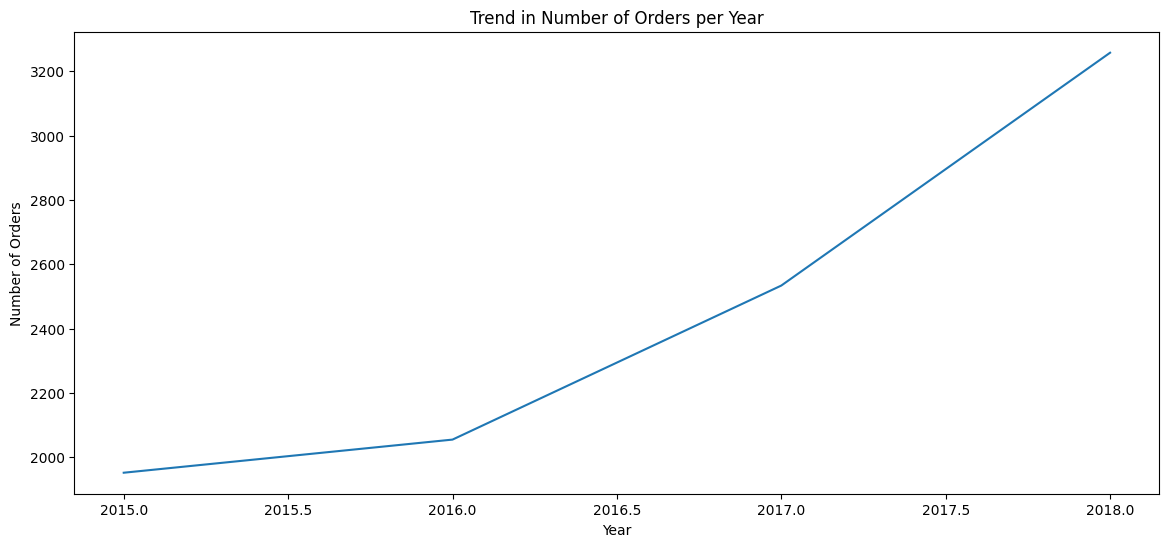

In [ ]:
#Trend for Number of Orders over the years
orders_per_year = doc.groupby('order_year')['order_id'].count()
plt.figure(figsize=(14, 6))
plt.plot(orders_per_year.index, orders_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.title('Trend in Number of Orders per Year')
plt.show()

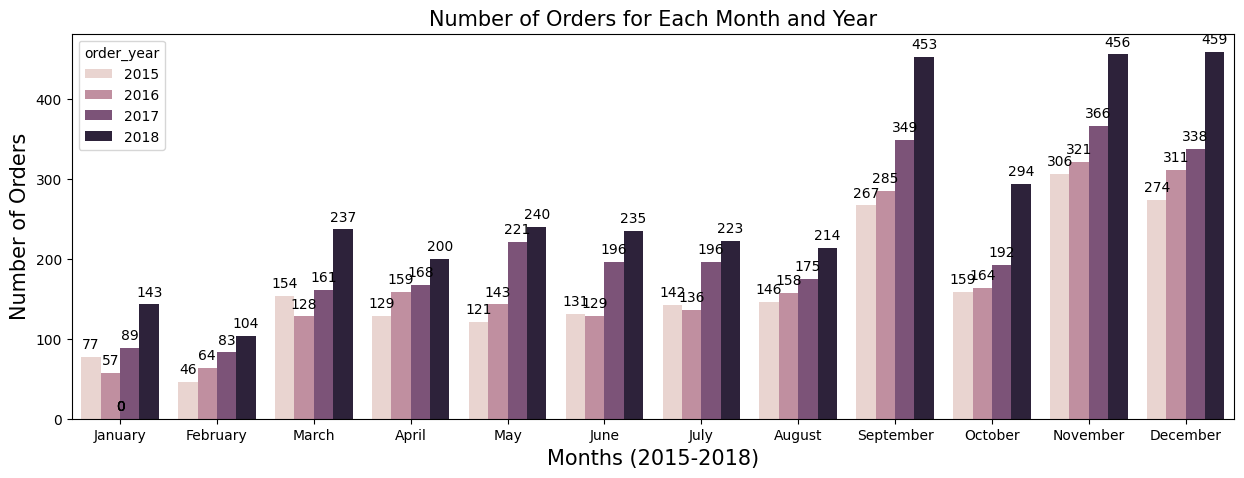

In [ ]:
#Comparing Orders per Month and Year
month_mapping_order = ['January','February','March','April','May','June',
                       'July','August','September','October','November','December']

plt.figure(figsize=(15, 5))
value = sb.countplot(data=doc, x='order_month', hue='order_year', order=month_mapping_order)
plt.title('Number of Orders for Each Month and Year', fontsize=15)
plt.xlabel('Months (2015-2018)', fontsize=15)
plt.ylabel('Number of Orders', fontsize=15)

for p in value.patches:
    value.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points',
                   fontsize=10)
plt.show()

*   As per the above graph we can see January & February show less number of orders w.r.t. the other months. While March - August show moderate number of orders. Furthermore number of orders are higher for September - December.
*   We can make calculated assupmtions on the basis of this graph and state that initial two months can be considered as off-season, on the other hand last two months can be considered as season for this superstore.



###Which are Highest and Least Sales Cities?

In [ ]:
#Sale on the basis of City
city_sales = doc.groupby('city')['sales'].sum().sort_values(ascending=False).reset_index()
city_sales.columns = ['City', 'Total Sales']
#print(city_sales.to_string(index=False))
print('Highest Sales Cities:')
print(city_sales.head(3).to_string(index=False))
print('Least Sales Cities:')
print(city_sales.tail(3).to_string(index=False))

Highest Sales Cities:
         City  Total Sales
New York City    252462.50
  Los Angeles    173420.14
      Seattle    116106.32
Least Sales Cities:
   City  Total Sales
Jupiter         2.06
 Elyria         1.82
Abilene         1.39


###Plot for Shipment mode

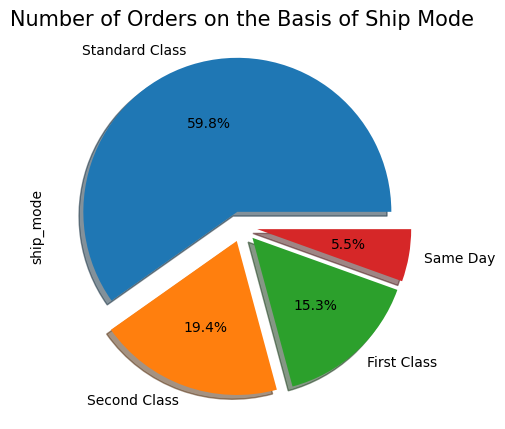

In [ ]:
#Percentage of orders on the basis of shipment mode
plt.figure(figsize=(15,5))
doc['ship_mode'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, explode=[0.1,0.1,0.1,0.1])
plt.title('Number of Orders on the Basis of Ship Mode', fontsize=15)
plt.show()

###Plot for Customer Segment

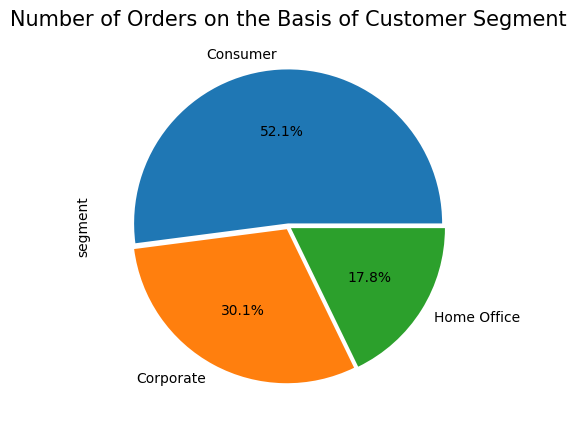

In [ ]:
#Percentage of orders on the basis of Segment
plt.figure(figsize=(15,5))
doc['segment'].value_counts().plot(kind='pie', autopct='%1.1f%%',explode=[0.02,0.02,0.02])
plt.title('Number of Orders on the Basis of Customer Segment', fontsize=15)
plt.show()

###Plot for Region

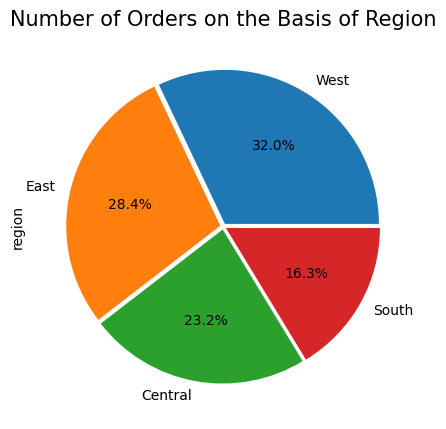

In [ ]:
#Percentage of orders on the basis of Region
plt.figure(figsize=(15,5))
doc['region'].value_counts().plot(kind='pie', autopct='%1.1f%%',explode=[0.02,0.02,0.02,0.02])
plt.title('Number of Orders on the Basis of Region', fontsize=15)
plt.show()

#**Thank You**